### Conversion Prediction

In this notebook, I attempt create a model that predicts the likelihood of a customer converting after visiting a website. A number of attributes are known about the customers such as the country of access, age, whether they are new, total pages visited and whether they convert or not.

Since conversion is the response metric I treat this as a binary classification challenge and implement a Logistic Classifier. I use ROC and AUC to evaluate the model's performance on the task.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#allow plots to appear inline
%matplotlib inline

#Import data from file
data = pd.read_csv('conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [21]:
data.shape

(316200, 6)

In [22]:
#The type conversion below can be implemented using get_dummies

lookuptable_country = {'UK':1, 'US':2, 'China':3, 'Germany':4}
lookuptable_source = {'Ads':1, 'Seo':2, 'Direct':3, }

data['ctry']= data['country'].map(lambda x: lookuptable_country[x])
data['src']= data['country'].map(lambda x: lookuptable_country[x])
data.head()

,country,age,new_user,source,total_pages_visited,converted,ctry,src
0,UK,25,1,Ads,1,0,1,1
1,US,23,1,Seo,5,0,2,2
2,US,28,1,Seo,4,0,2,2
3,China,39,1,Seo,5,0,3,3
4,US,30,1,Seo,6,0,2,2


#### Exploratory Analysis

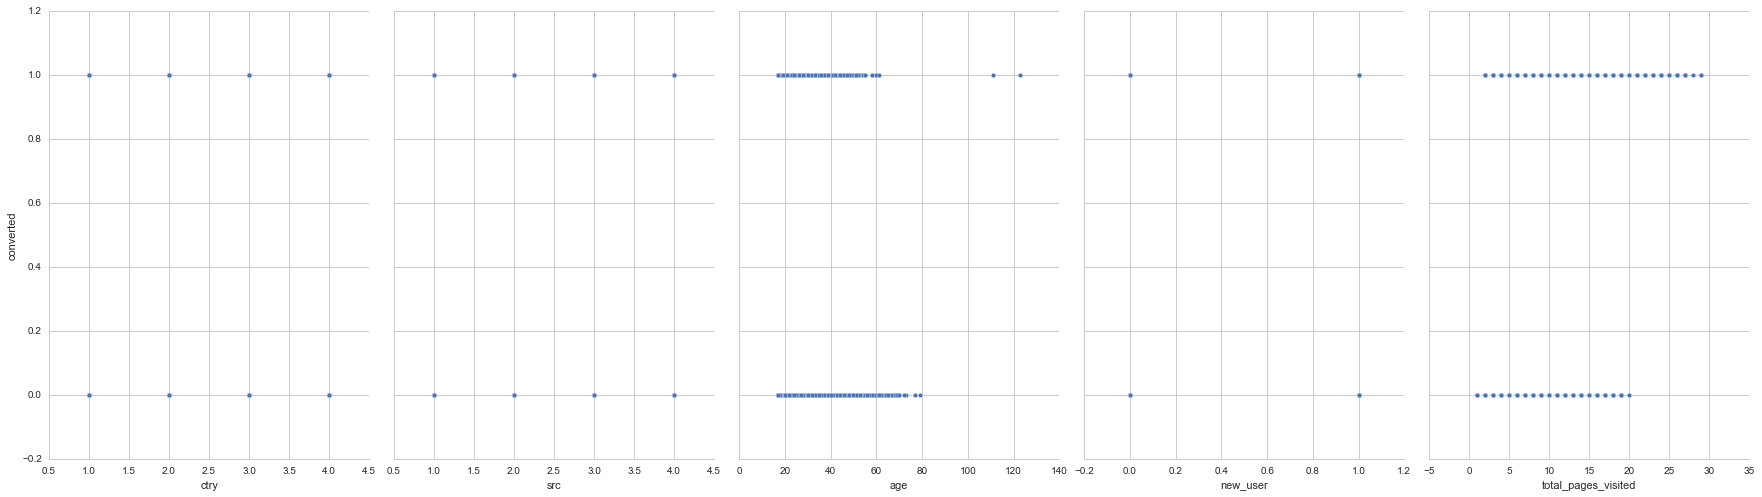

In [23]:
#To get a sense of the data distribution, I did a scatter plot of each independent variable with the conversion rate
#Age and total pages visited already seem to have a slightly different distribution as compared to the other variables.


sns.pairplot(data,x_vars=['ctry','src','age','new_user','total_pages_visited'],y_vars='converted',size=7, aspect =0.7)

In [29]:
print(sorted(data.country.unique()))
print(sorted(data.source.unique()))

['China', 'Germany', 'UK', 'US']
['Ads', 'Direct', 'Seo']


Country and Source seem to be norminal and categorical variables. As such I bar graphs to represent them.

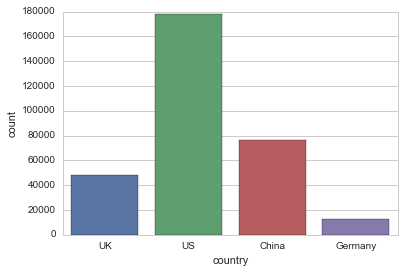

In [49]:
sns.set_style("whitegrid")

#mydata = sns.load_dataset(data)

ax = sns.countplot(data=data, x="country")

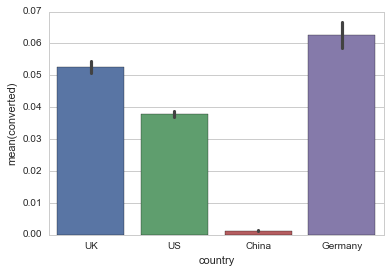

In [48]:
ax2 = sns.barplot(data=data, x="country",y="converted")

##### Country Analysis

From the first graph (count) we see that most of the data is from the US followed by China and Germany has the least. From the 2nd graph showing the mean, we see that Germany has the highest average convertion rate while China has the least. This suggests a strong co-relation between country and conversion.

Next, we explore source

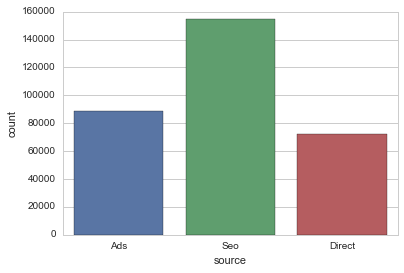

In [35]:
sns.countplot(data=data, x="source")

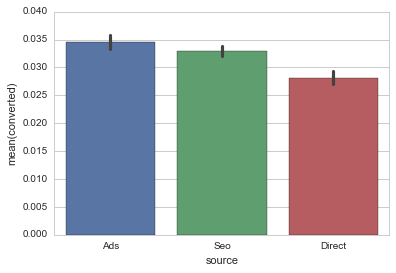

In [36]:
sns.barplot(data=data, x="source",y = "converted")

###### Source Analysis

Most of the people sampled had been reached by Search Engine Optimisation. Ads however seems to have had the highest conversion rate.

Next we analysis new user which is also categorical

In [52]:
data['country'] = data.country.astype('category')
data['source'] = data.source.astype('category')

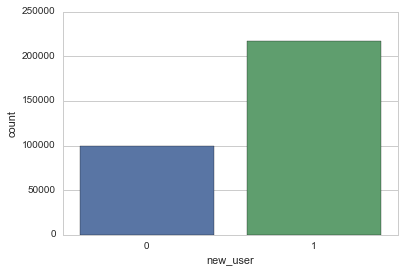

In [50]:
sns.countplot(data=data, x="new_user")

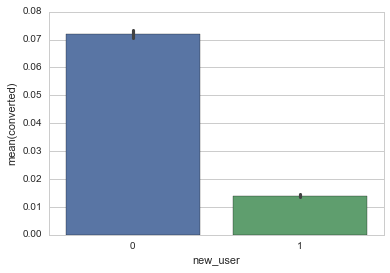

In [51]:
sns.barplot(data=data, x="new_user",y="converted")

Again here we see that new users convert slightly over 10%of the time, while returning users convert over 70% of the time

In [80]:
#z = data.groupby(['total_pages_visited','converted'=="1"])
#i = df.pivot(index='total_pages_visited', columns='variable', values='value')

#plt.plot(x,y)
result = data['country'].apply(pd.value_counts).fillna(0)
result.tail()

,China,Germany,UK,US
316195,0.0,0.0,0.0,1.0
316196,0.0,0.0,0.0,1.0
316197,1.0,0.0,0.0,0.0
316198,0.0,0.0,0.0,1.0
316199,0.0,0.0,1.0,0.0


In [54]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [53]:
data.head()

,country,age,new_user,source,total_pages_visited,converted,ctry,src
0,UK,25,1,Ads,1,0,1,1
1,US,23,1,Seo,5,0,2,2
2,US,28,1,Seo,4,0,2,2
3,China,39,1,Seo,5,0,3,3
4,US,30,1,Seo,6,0,2,2


In [54]:
#Define X, the input matrix with input features
feature_cols = ['ctry', 'age', 'new_user','src','total_pages_visited']
feature_cols2 = ['age', 'total_pages_visited']
X = data[feature_cols]
print(X.head())

#define y, the response vector
y = data.converted
print(y.head())

   ctry  age  new_user  src  total_pages_visited
0     1   25         1    1                    1
1     2   23         1    2                    5
2     2   28         1    2                    4
3     3   39         1    3                    5
4     2   30         1    2                    6
0    0
1    0
2    0
3    0
4    0
Name: converted, dtype: int64


In [55]:
#Split into training and test sets using the default split which is 75/25%
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(237150, 5)
(79050, 5)
(237150,)
(79050,)


In [56]:
#Build a logistic regression model and make predictions. 

from sklearn.linear_model import LogisticRegression #import
model = LogisticRegression() #instatiate
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
#make prediction
y_pred = model.predict(X_test)

In [58]:
#Evaluation

import numpy as np
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred ) # pos_label=2)
roc_auc = auc(fpr,tpr)

In [59]:
print(fpr, tpr, thresholds, roc_auc)


[ 0.          0.00401307  1.        ] [ 0.          0.66784314  1.        ] [2 1 0] 0.83191503268


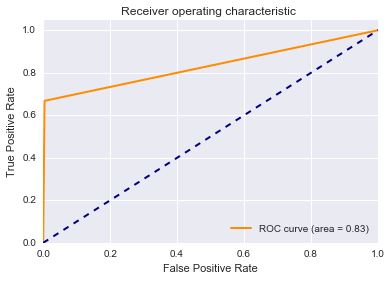

In [60]:
#plot roc curve


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #plot the random
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

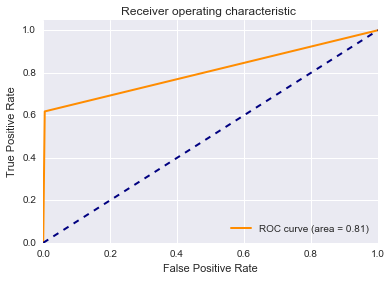

In [61]:
'''
In this section i play around with the features
'''

feature_cols2 = ['ctry','total_pages_visited']
X = data[feature_cols2]
y = data.converted

#Split into training and test sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,random_state = 1)

#Build a logistic regression model and make predictions. import,instatiate, and fit

from sklearn.linear_model import LogisticRegression #import
model = LogisticRegression() #instatiate
model.fit(X_train,y_train)

#make prediction
y_pred = model.predict(X_test)

#Evaluation
import numpy as np
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred,)# pos_label=2)
roc_auc = auc(fpr,tpr)

#plot roc curve

import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #plot the random
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

In [62]:
pd.get_dummies(data.country)
data.head()

,country,age,new_user,source,total_pages_visited,converted,ctry,src
0,UK,25,1,Ads,1,0,1,1
1,US,23,1,Seo,5,0,2,2
2,US,28,1,Seo,4,0,2,2
3,China,39,1,Seo,5,0,3,3
4,US,30,1,Seo,6,0,2,2
